In [11]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_first = pd.read_csv(r'C:\ai\downloads\shareData\부동산\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [5]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(3)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


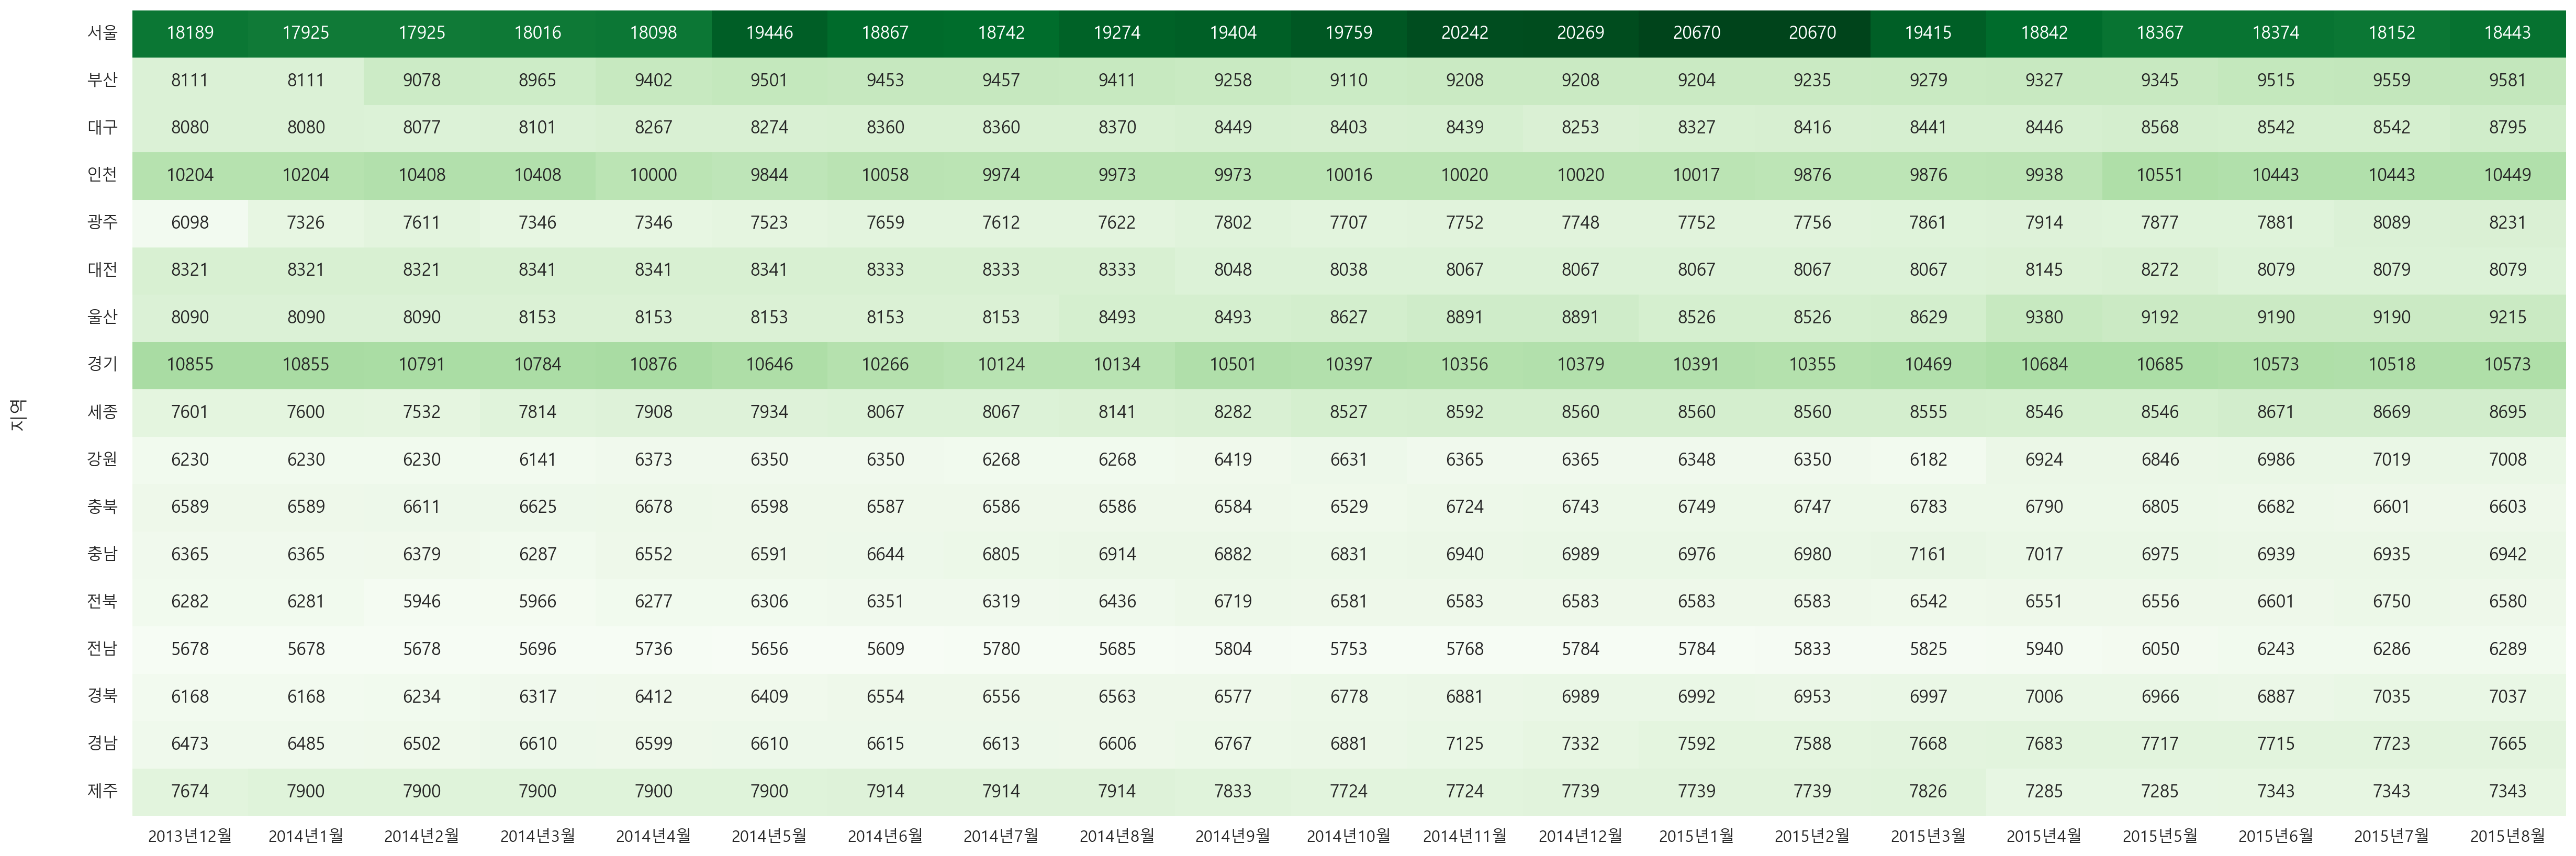

In [16]:
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='.0f', cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.ylabel("지역", rotation=90, labelpad=40)
plt.yticks(rotation=0)     
plt.show()

In [18]:
df_last = pd.read_csv(r'C:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [19]:
df_last.loc[0, '분양가격(제곱미터)']

'5841'

In [20]:
pd.to_numeric(df_last['분양가격(제곱미터)'], 
              errors='coerce').isna().sum() 


744

In [21]:
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].shape

(126, 5)

In [22]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip() == '', 
            '지역명'].value_counts()

세종    30
제주    19
대구    19
광주    12
전남    11
대전    10
울산    10
전북     8
경남     5
서울     2
Name: 지역명, dtype: int64

In [23]:
df_last[df_last['분양가격(제곱미터)'].notnull() &
   (df_last['분양가격(제곱미터)'].str.find(',')!=-1)]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


In [24]:
temp = '12,523'
temp.replace(',','')

'12523'

In [25]:
temp = '12,523'
tempsloited = temp.split(',')
''.join(tempsloited)

'12523'

In [26]:
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    
    if price is np.nan:
        pass
    elif price.strip() =='': 
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',')!=-1: 
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
 
commadrop(df_last.loc[80])
commadrop(df_last.loc[1])
commadrop(df_last.loc[28]) 
commadrop(df_last.loc[368]) 

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [27]:
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [28]:
df_last.apply(commadrop, axis=1).isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    740
dtype: int64

In [30]:
def commadrop2(price):
    pass

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) 
commadrop2(df_last.loc[1, '분양가격(제곱미터)'])  
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) 
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) 

In [31]:
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplied = price.split(',')
        return float(''.join(pricesplied))
    else: 
        return float(price)
commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 na

nan

In [32]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [33]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')).isna().sum()

740

In [34]:
df_last['분양가격(제곱미터)'] = \
    pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))


In [35]:
df_last.loc[80]
df_last.loc[28]
df_last.loc[368]
df_last.loc[1]

지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)           5652.0
Name: 1, dtype: object

In [36]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [37]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [38]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [39]:

x = '전용면적 85제곱미터초과 102제곱미터이하'
import re
re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~')

'85m²~102m²'

In [40]:
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : 
    re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~'))
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²


In [41]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m²' '60m²~85m²' '85m²~102m²' '102m²~']


In [45]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [44]:
df_last.drop(['규모구분','분양가격(제곱미터)'],axis=1, inplace=True) # 열제거

In [46]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [49]:
df_last.to_csv('df_last1.csv', index=False)


In [51]:

df_last.to_csv('df_last1.csv', index=False)

df_last = pd.read_csv('df_last1.csv')
df_last.head()


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~


In [53]:
col = df_last.pop('전용면적')
df_last.insert(1, '전용면적', col) 
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60m²,2024,8,NaN
9092,제주,60m²~85m²,2024,8,24799.5
9093,제주,85m²~102m²,2024,8,NaN


In [56]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round(0)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7319.0,12296.0,8807.0,8288.0,9600.0,12192.0,9913.0,11638.0,21864.0,9133.0,10630.0,11672.0,7413.0,7406.0,12629.0,8157.0,7463.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021,10291.0,14567.0,11302.0,11227.0,13710.0,15586.0,11994.0,14318.0,29380.0,12578.0,14192.0,15774.0,9981.0,9048.0,22302.0,9861.0,8822.0
2022,11644.0,16622.0,12456.0,12018.0,15096.0,16822.0,14114.0,18167.0,29129.0,11310.0,17904.0,17342.0,10636.0,10003.0,18954.0,11730.0,10034.0
2023,13409.0,20175.0,13283.0,13025.0,17958.0,17657.0,17917.0,20471.0,33231.0,12278.0,18832.0,16151.0,11847.0,10966.0,24096.0,12581.0,11104.0


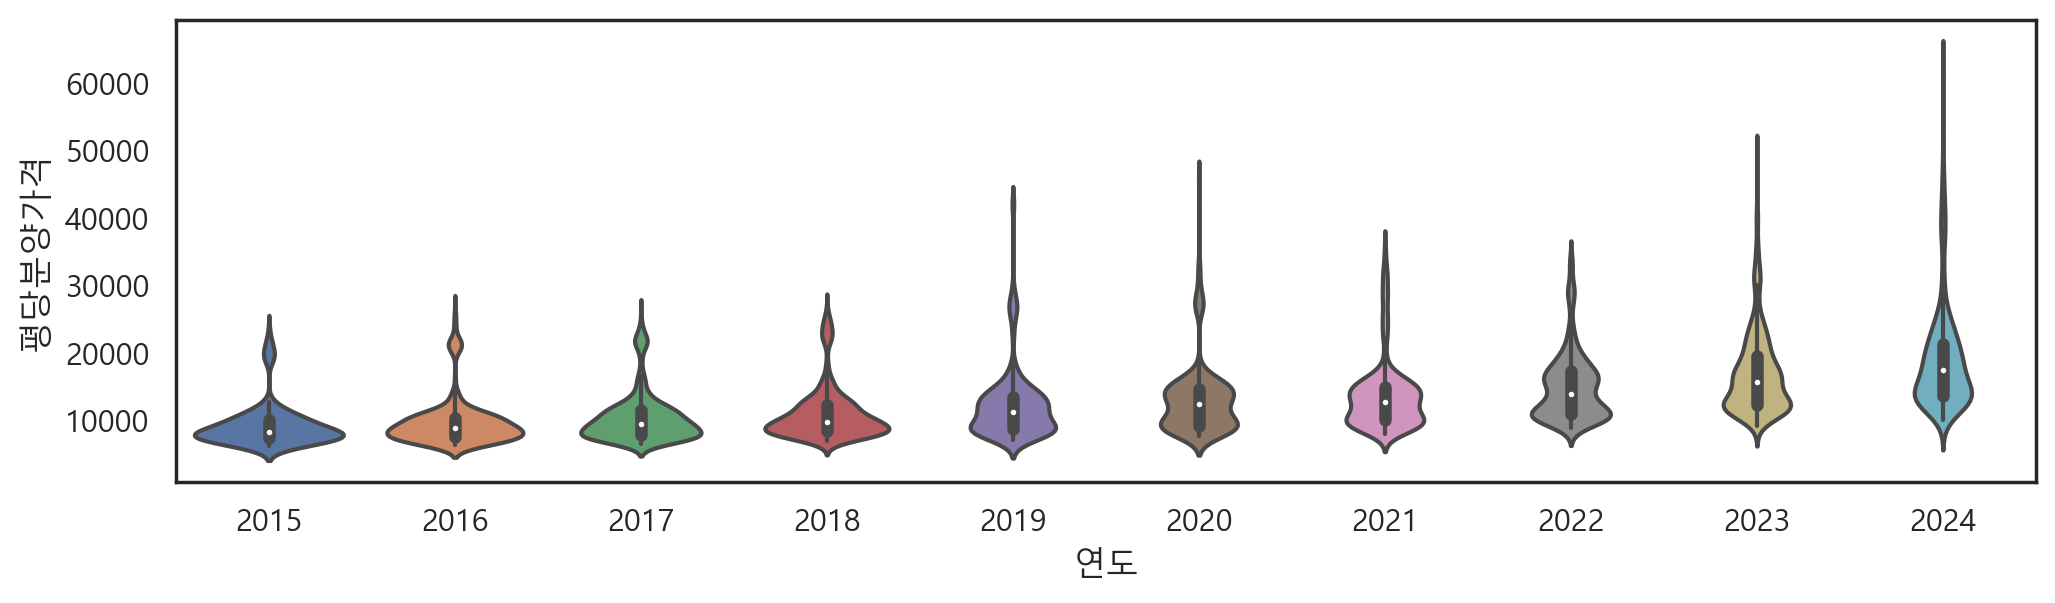

In [57]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

In [59]:
df_first = pd.read_csv(r'C:\ai\downloads\shareData\부동산\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
display(df_first.head(1))
display(df_last.head(1))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3


In [60]:
new_first = df_first.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
new_first.head(1)

,지역,연도월,평당분양가격
0,서울,2013년12월,18189


In [61]:
parse_year = lambda datestr :int(datestr.split('년')[0])
parse_year('2013년12월')

2013

In [62]:
parse_month = lambda datestr : int(datestr.split('년')[-1][:-1])
parse_month('2013년12월')

12

In [63]:
new_first['연도'] = new_first['연도월'].map(
                            lambda datestr : int(datestr.split('년')[0])
                    )
new_first['월'] = new_first['연도월'].apply(
                            lambda datestr : int(datestr.split('년')[-1][:-1])
                    )
new_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [64]:
new_first.drop('연도월', axis=1, inplace=True)
new_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [72]:
new_first = new_first.rename(columns={'지역':'지역명'})
new_first.tail(1)

,지역명,평당분양가격,연도,월
356,제주,7343,2015,8


In [71]:
new_last = df_last[df_last['전용면적']=='모든면적']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.sample()

,지역명,연도,월,평당분양가격
4100,대구,2019,10,14536.5


In [70]:
new_last = df_last[df_last['전용면적']=='모든면적']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.sample()

,지역명,연도,월,평당분양가격
465,세종,2016,3,8811.0


In [69]:
df = pd.concat([new_first, new_last]).reset_index(drop=True)
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
